EXERCICI 1 EXERCICI 2  EXERCICI 3 EXERCICI 4    EXERCICI 5
* Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
* Compara’ls en base al MSE i al R2.
* Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
* Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).
* No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.


In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df=pd.read_csv('C:\\Users\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\Test Hipotesis and Machine Learning\\M5\\housing data.csv')
df.columns=['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']   
df.head()        

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


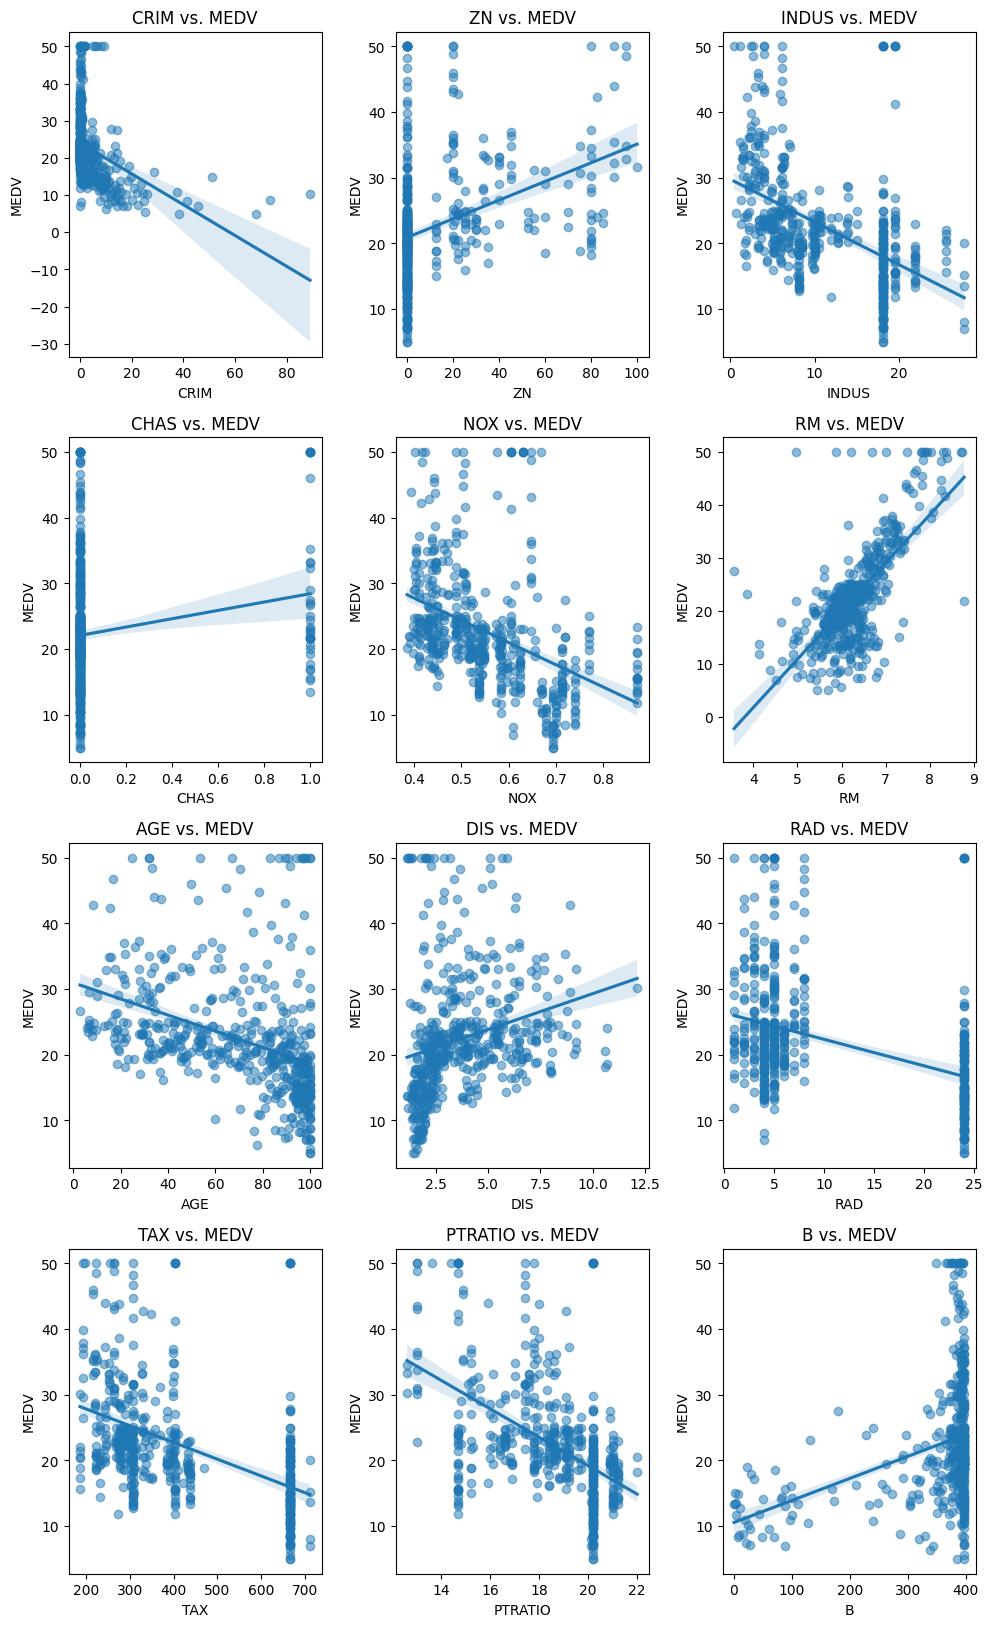

In [203]:
#Miro en un grafico de puntos la relación que tienen las variables con MEDV. No parecen muy relacionadas. RM es la que mas

variables_ind= ['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']
n_filas=5
n_columnas=3

fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(10, 20))
axes = axes.flatten()

for i, variable in enumerate(variables_ind[:-1]):
    sns.regplot(x=df[variable], y=df['MEDV'], ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(f'{variable} vs. MEDV')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('MEDV')

#elimino los graficos vacios

for j in range(len(variables_ind) - 1, n_filas * n_columnas):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

No hay una relación lineal entre la mayor parte de las variables

MIRO LAS CORRELACIONES QUE HAY ENTRE LAS VARIABLES para ver cuales escojo para el modelo

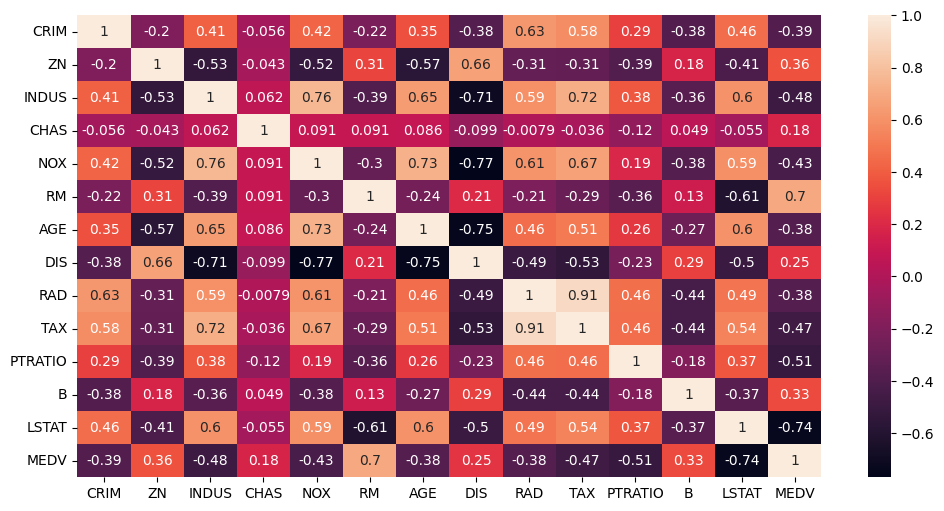

In [204]:
import seaborn as sns

plt.figure(figsize=(12,6))
graf1= sns.heatmap(df.corr(), annot=True)

Miro los estadisticos para escoger variables

In [205]:
import statsmodels.api as sm

x= df[['CRIM', 'ZN','NOX','RM', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']]      
y= df ['MEDV']

x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          5.26e-136
Time:                        19:48:54   Log-Likelihood:                -1500.6
No. Observations:                 505   AIC:                             3023.
Df Residuals:                     494   BIC:                             3070.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8226      5.111      7.204      0.0

El grafico de la mejor correlación es el siguiente

A mas bajo estatus la media de la vivienda es mas barata


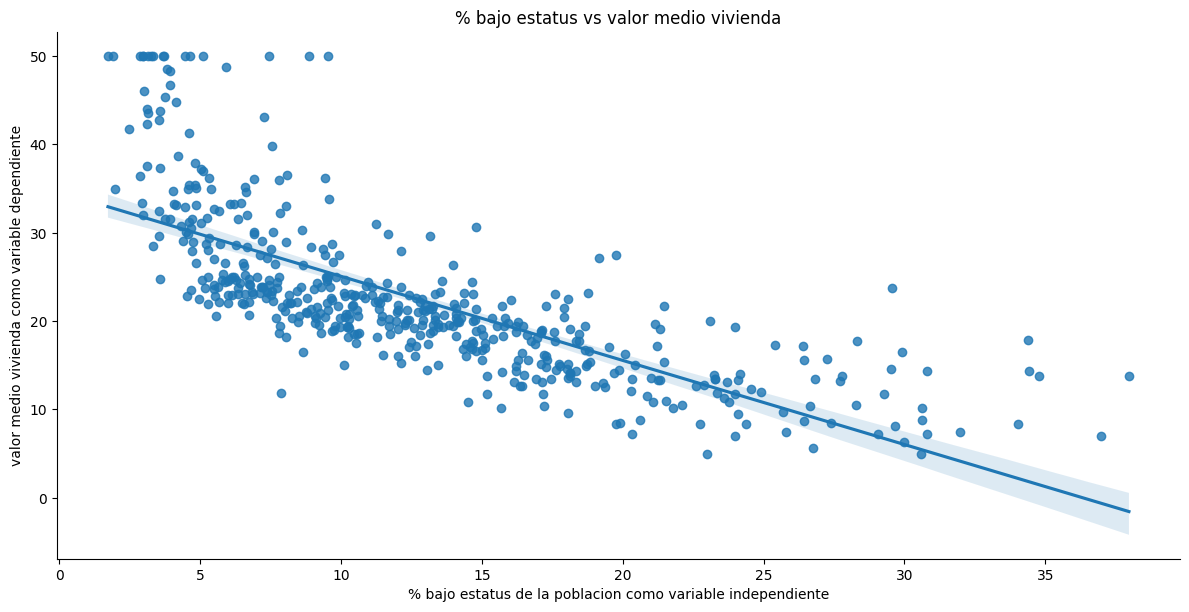

In [206]:
sns.lmplot(x='LSTAT', y='MEDV', data=df, aspect=2, height=6)
plt.xlabel ('% bajo estatus de la poblacion como variable independiente')
plt.ylabel('valor medio vivienda como variable dependiente')
plt.title('% bajo estatus vs valor medio vivienda')
print('A mas bajo estatus la media de la vivienda es mas barata')

Voy a hacer dos modelos de regresion, uno lineal multiple con LSTAT y DIS ya que estas dos caracteristicas tienen 
una mayor correlación lineal y un modelo Gradient Boosting que trabaja bien con relaciones no lineales

nuevo dataframe para el modelo lineal multiple

In [207]:
data=df.drop(['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'RAD','TAX','PTRATIO', 'B'], axis=1)
data.describe()

,DIS,LSTAT,MEDV
count,505.000000,505.000000,505.000000
mean,3.794459,12.668257,22.529901
std,2.107757,7.139950,9.205991
min,1.129600,1.730000,5.000000
25%,2.100000,7.010000,17.000000
50%,3.199200,11.380000,21.200000
75%,5.211900,16.960000,25.000000
max,12.126500,37.970000,50.000000


Hago un pre-procesamiento de los datos. Utilizao Robustscaler ya que en los datos, hay muchos valores atipicos o dispersos


In [208]:
from sklearn.preprocessing import RobustScaler

x=data[['LSTAT', 'DIS']]
y=data['MEDV']

scaler = RobustScaler()
xs_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled = scaler.fit_transform(x)

realizo la prueba de Shapiro para mirar la normalidad entre variantes y el calculo de factor de inflación varianza
para evaluar la multicolinealidad entre las variables independientes

Shapiro para las variables:'LSTAT', 'DIS'

In [209]:
from scipy.stats import shapiro

for i, column in enumerate(x.columns):
    stat, p_value = shapiro(x_scaled[:, i])
    print(f"Variable: {column}, Estadística de prueba: {stat}, Valor p: {p_value}")

print('la prueba de estadistica sugiere que hay normalidad en los datos, pero el valor de p_valor nos dice que NO hay normalidad')


Variable: LSTAT, Estadística de prueba: 0.9372732639312744, Valor p: 9.55330920707903e-14
Variable: DIS, Estadística de prueba: 0.9028689861297607, Valor p: 2.111984671494482e-17
la prueba de estadistica sugiere que hay normalidad en los datos, pero el valor de p_valor nos dice que NO hay normalidad


voy a transformar los datos para hacerlos mas normales con transformacion logaritmica

In [210]:
x['LSTAT_transformed'] = np.log1p(x['LSTAT'])
x['DIS_transformed'] = np.log1p(x['DIS'])


In [211]:
data

,DIS,LSTAT,MEDV
0,4.9671,9.14,21.6
1,4.9671,4.03,34.7
2,6.0622,2.94,33.4
3,6.0622,5.33,36.2
4,6.0622,5.21,28.7
...,...,...,...
500,2.4786,9.67,22.4
501,2.2875,9.08,20.6
502,2.1675,5.64,23.9
503,2.3889,6.48,22.0


realizo Shapiro y no mejora mucho con la transformación logaritmica. NO es un modelo de predicción muy robusto

In [212]:
for column in ['LSTAT_transformed', 'DIS_transformed']:
    stat, p_value = shapiro(x[column])
    print(f"Variable: {column}, Estadística de prueba: {stat}, Valor p: {p_value}")

Variable: LSTAT_transformed, Estadística de prueba: 0.9891273379325867, Valor p: 0.000844181515276432
Variable: DIS_transformed, Estadística de prueba: 0.9629218578338623, Valor p: 5.628218446851463e-10


In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

calculo la VIF para las variables x

In [214]:
vif_data = pd.DataFrame()
vif_data["Variable"] = xs_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(xs_scaled.values, i) for i in range(xs_scaled.shape[1])]

print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)

Factor de Inflación de la Varianza (VIF):
  Variable       VIF
0    LSTAT  1.217364
1      DIS  1.217364


vemos que no hay multicolinealidad entre las variables

CREO MODELO DE REGRESION LINEAL MULTIPLE

Voy a emplear el train/test para un mejor resultado. Divido los datos en dependientes y, y los independientes X


In [215]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x=x[['LSTAT_transformed', 'DIS_transformed']]
y=data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)

CREO EL MODELO LINEAL DE REGRESION MULTIPLE

In [216]:
modelo_lineal=LinearRegression()

modelo_lineal.fit(x_train,y_train)

LinearRegression()

In [217]:
y_prediccion= modelo_lineal.predict (x_test)

Validez del modelo lineal de regresión multiple

In [218]:
r2 = r2_score(y_test, y_prediccion)
mse = mean_squared_error(y_test, y_prediccion)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')

el r2 es: 0.611254181924693, es mas fiable si es cercano a 1
el mse es: 22.375908992654804, es mejor si es  bajo


voy a regularizar lo datos con Lasso para intentar obtener un mejor modelo

In [219]:
from sklearn.linear_model import Lasso, LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

lasso_coefs = lasso_model.coef_

In [220]:
linear_model = LinearRegression()
linear_model.coef_ = lasso_coefs  # Utilizar los coeficientes obtenidos de Lasso
linear_model.intercept_ = lasso_model.intercept_

In [221]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [222]:
y_pred1=linear_model.predict(x_test)

In [223]:
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')


el r2 es: 0.6298358125342005, es mas fiable si es cercano a 1
el mse es: 20.626346840673683, es mejor si es  bajo


Aplicando la regularización con Lasso obtenemos un mejor rendimiento del modelo lineal multiple aunque podemos ver 
que el rendimiento es general, todo y la mejora,  es bastante bajo

CREO EL MODELO DE GRADIEST BOOSTING REGRESSION ya que funciona bien para variables no lineales

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

x=df[['CRIM', 'ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']]
y=df['MEDV']

divido los datos de test y entrenamiento

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

creo el modelo de Grandient Boosting Regression, entreno el modelo y realizo las predicciones

In [226]:
gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_model.fit(x_train, y_train)
y_pred = gradient_model.predict(x_test)

evaluo el rendimiento

In [227]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')


el r2 es: 0.9079497944010968, es mas fiable si es cercano a 1
el mse es: 5.12923597616726, es mejor si es  bajo


para intentar mejorar el modelo, busco los parametros que me daran una mejor preidicción

In [228]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}

creo el modelo

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

realizo la busqueda de los mejores parametros

In [230]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

print("Mejores parámetros encontrados:")
print(best_params)


Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


el modelo optimo tiene una tasa de aprendizaje de 0,1, una profundidad maxima de 3 para cada arbol y se construyeron
200 arboles en el bosque. Se utilizaran estos parametros para  hacer el modelo de Gradient Boosting Regressor

In [231]:
best_modelo=GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
#best_modelo=GradientBoostingRegressor(**best_params)
best_modelo.fit(x, y)

GradientBoostingRegressor(n_estimators=200, random_state=42)

realizo predicciones

In [232]:
y_pred2= best_modelo.predict(x_test)

validez del modelo

In [234]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'el r2 es: {r2}, es mas fiable si es cercano a 1')
print(f'el mse es: {mse}, es mejor si es  bajo')


el r2 es: 0.9828398097823233, es mas fiable si es cercano a 1
el mse es: 0.9562028074756359, es mejor si es  bajo


mejoramos notablemente el rendimiento del modelo al buscar lo mejores parametros para Gradient Boosting Regressor,
pasamos de r2 es: 0.9079497944010968, mse: 5.12923597616726 sin ajuste, a un rendimiento de r2 es: 0.9828398097823233 y mse: 0.9562028074756359 con los mejores parametros


Como conclusión: en el modelo lineal hemos podido llegar con la regularización de Lasso a un r2=0,62 y un 
mse de 20,62. En  el modelo de Gradient Boosting Regressor, despues de buscar los mejores parametros, obtenemos un r2 de 0,98 y un mse de 0,95

Sin ninguna duda, para hacer predicciones con la base de datos que disponemos, es mucho mejor el modelo de Gradient Boosting Regressor ya que nuestros datos no tienen un patron lineal.